In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
dataset=pd.read_csv('diabetes.csv')

In [3]:
dataset.head(10).T

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.iloc[:,0:-1]=dataset.replace(0,np.NaN)

In [7]:
dataset.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
dataset['Pregnancies'].fillna(dataset['Pregnancies'].mean(),inplace=True)
dataset['Glucose'].fillna(dataset['Glucose'].mean(),inplace=True) 
dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean(),inplace=True)
dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean(),inplace=True)
dataset['Insulin'].fillna(dataset['Insulin'].mean(),inplace=True)
dataset['BMI'].fillna(dataset['BMI'].mean(),inplace=True)

In [9]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

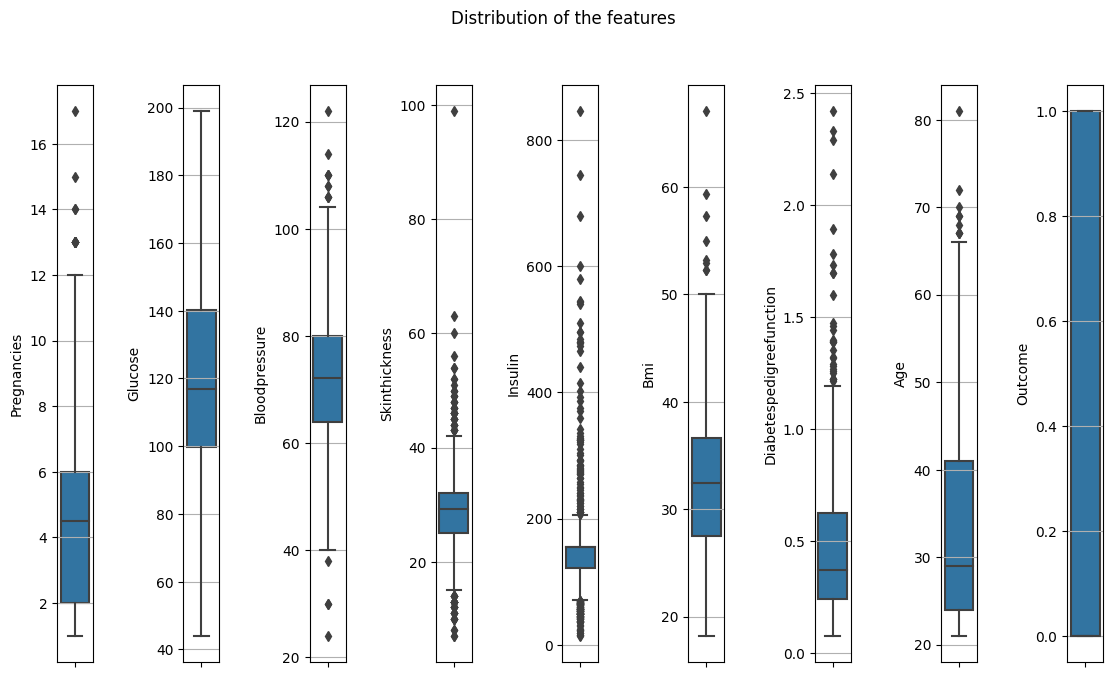

In [11]:
columns = dataset.columns
n_columns = len(columns)
fig, axes = plt.subplots(1, n_columns, figsize=(1.5 * n_columns, 7.5))
fig.suptitle('Distribution of the features')
plt.subplots_adjust(wspace=2.5)
for index, col in enumerate(columns):
  ax = axes[int(index % n_columns)]
  ax.grid()
  sea.boxplot(data=dataset, y=col, ax=ax)
  ax.set_ylabel(col.title())

0    500
1    268
Name: Outcome, dtype: int64


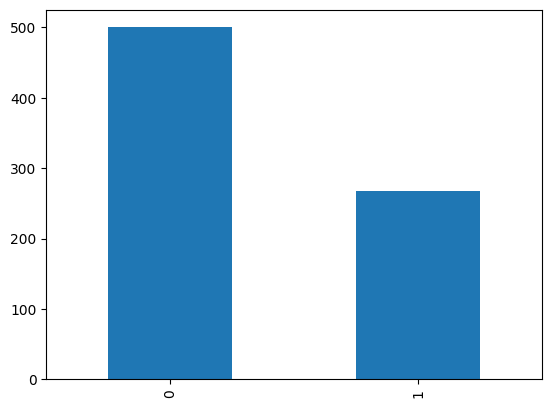

In [ ]:
bar=dataset['Outcome'].value_counts().plot(kind='bar')
print(dataset['Outcome'].value_counts())


<AxesSubplot:>

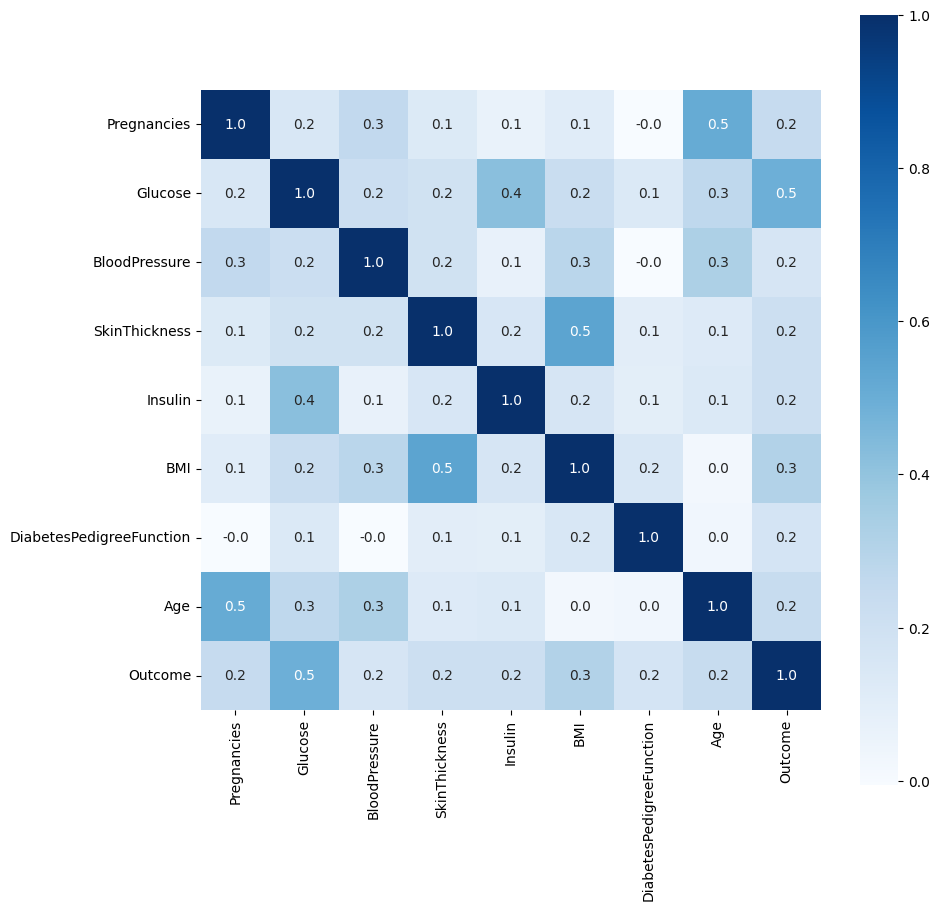

In [ ]:
correlation=dataset.corr()
plt.figure(figsize=(10,10))
sea.heatmap(correlation , cbar=True , square=True , fmt='0.1f' , annot=True ,annot_kws={'size':10} , cmap='Blues')


In [ ]:
x=dataset.iloc[:,:-1]


In [ ]:
y=dataset['Outcome'].apply(lambda b_value:'Confirmed' if b_value>=1 else 'Not Confirmed')


In [ ]:
diabetes= y.value_counts()
diabetes

Not Confirmed    500
Confirmed        268
Name: Outcome, dtype: int64

([<matplotlib.patches.Wedge at 0x7f957959d160>,
 [Text(-0.5025943242672991, 0.9784676515931925, 'Not Confirmed'),
  Text(0.5025944158780503, -0.9784676045369114, 'Confirmed')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.10'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90')])

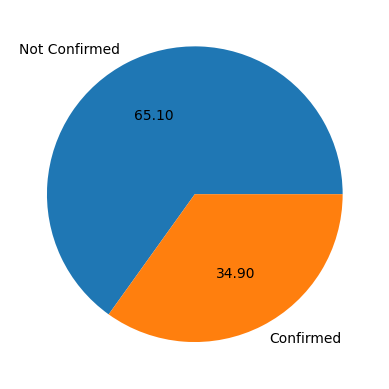

In [ ]:
fig,ax=plt.subplots()
ax.pie(y.value_counts(),autopct='%.2f',labels=diabetes.index)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
x, y = RandomUnderSampler(random_state=42).fit_resample(x, y)

([<matplotlib.patches.Wedge at 0x7f9589b4b430>,
 [Text(6.735557395310444e-17, 1.1, 'Not Confirmed'),
  Text(-2.0206672185931328e-16, -1.1, 'Confirmed')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

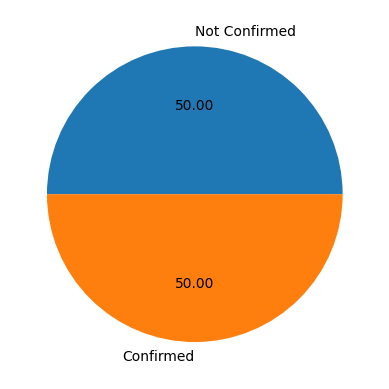

In [ ]:
fig,ax=plt.subplots()
ax.pie(y.value_counts(),autopct='%.2f',labels=diabetes.index)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
OutcomePred=classifier.predict(x_test)

In [ ]:
OutcomePred

array(['Confirmed', 'Confirmed', 'Not Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Confirmed', 'Not Confirmed',
       'Confirmed', 'Confirmed', 'Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Confirmed', 'Confirmed',
       'Not Confirmed', 'Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Not Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Not Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Confirmed', 'Confirmed', 'Confirmed', 'Confirmed',
       'Not Confirmed', 'Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 

In [ ]:
from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(y_test, OutcomePred)
confMat


array([[44, 17],
       [12, 35]])

In [ ]:
from sklearn.metrics import accuracy_score
accScore=accuracy_score(y_test,OutcomePred)
print("accuracy:",accScore*100)

accuracy: 73.14814814814815


In [ ]:
from sklearn.metrics import classification_report
reportDT=classification_report(y_test,OutcomePred)
print(reportDT)

               precision    recall  f1-score   support

    Confirmed       0.79      0.72      0.75        61
Not Confirmed       0.67      0.74      0.71        47

     accuracy                           0.73       108
    macro avg       0.73      0.73      0.73       108
 weighted avg       0.74      0.73      0.73       108



# **RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RMclassifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RMclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
OutcomeOfRM=RMclassifier.predict(x_test)

In [ ]:
OutcomeOfRM

array(['Confirmed', 'Confirmed', 'Not Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Confirmed', 'Confirmed',
       'Confirmed', 'Confirmed', 'Not Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Confirmed', 'Confirmed',
       'Confirmed', 'Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Not Confirmed', 'Not Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Confirmed', 'Confirmed', 'Not Confirmed',
       'Confirmed', 'Not Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Not Confirmed', 'Confirmed', 'Confirmed',
       'Confirmed', 'Not Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Not Confirmed', 'Confirmed',
       'Confirmed', 'Confirmed', 'Confirmed', 'Not Confirmed',

In [ ]:
from sklearn.metrics import confusion_matrix
confMatRM=confusion_matrix(y_test,OutcomeOfRM)
confMatRM

array([[50, 11],
       [ 9, 38]])

In [ ]:
from sklearn.metrics import accuracy_score
accScoreRM=accuracy_score(y_test,OutcomeOfRM)
print("accuracy:",accScoreRM*100)


accuracy: 81.48148148148148


In [ ]:
from sklearn.metrics import classification_report
reportRM=classification_report(y_test,OutcomeOfRM)
print(reportRM)

               precision    recall  f1-score   support

    Confirmed       0.85      0.82      0.83        61
Not Confirmed       0.78      0.81      0.79        47

     accuracy                           0.81       108
    macro avg       0.81      0.81      0.81       108
 weighted avg       0.82      0.81      0.82       108



# **Navie bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
OutcomeOfNB=classifierNB.predict(x_test)
OutcomeOfNB

array(['Not Confirmed', 'Confirmed', 'Not Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Confirmed', 'Confirmed',
       'Not Confirmed', 'Confirmed', 'Not Confirmed', 'Confirmed',
       'Confirmed', 'Not Confirmed', 'Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Confirmed', 'Not Confirmed',
       'Confirmed', 'Not Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Not Confirmed', 'Not Confirmed', 'Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Confirmed', 'Not Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Not Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Confirmed', 'Not Confirmed', 'Confirmed',
       'Confirmed', 'Not Confirmed', 'Confirmed', 'Not Confirmed',
       'Not Confirmed', 'Not Confirmed', 'Not Confirmed', 'Confirmed',
       'Confirmed', 'Confirmed', 'Conf

In [ ]:
from sklearn.metrics import confusion_matrix
confMatNB=confusion_matrix(y_test,OutcomeOfNB)
confMatNB

array([[39, 22],
       [ 8, 39]])

In [ ]:
from sklearn.metrics import accuracy_score
accScoreNB=accuracy_score(y_test,OutcomeOfNB)
print("accuracy:",accScoreNB*100)

accuracy: 72.22222222222221


In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,OutcomeOfNB)
print(report)

               precision    recall  f1-score   support

    Confirmed       0.83      0.64      0.72        61
Not Confirmed       0.64      0.83      0.72        47

     accuracy                           0.72       108
    macro avg       0.73      0.73      0.72       108
 weighted avg       0.75      0.72      0.72       108

